### Импорт необходимых библиотек

In [34]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

from sklearn.preprocessing       import StandardScaler, LabelEncoder
from sklearn.metrics             import mean_squared_error, r2_score
from ucimlrepo                   import fetch_ucirepo
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense, SimpleRNN, GRU, LSTM
from tensorflow.keras.optimizers import Adam


### Загрузка и подготовка данных

In [35]:
steel_industry_energy_consumption = fetch_ucirepo(id=851)
X = steel_industry_energy_consumption.data.features
y = steel_industry_energy_consumption.data.targets

data = pd.concat([X, y], axis=1)

label_encoder = LabelEncoder()
data['WeekStatus']  = label_encoder.fit_transform(data['WeekStatus'])
data['Day_of_week'] = label_encoder.fit_transform(data['Day_of_week'])
data['Load_Type']   = label_encoder.fit_transform(data['Load_Type'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data  = scaled_data[train_size:]


### Создание последовательностей для временных рядов

In [36]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length, 0]  
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test   = create_sequences(test_data, seq_length)

### Создание RNN

In [37]:
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

rnn_model = build_rnn_model((seq_length, X_train.shape[2]))
rnn_model.summary()


C:\Users\ofussr\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 50)             │         3,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,101 (12.11 KB)

 Trainable params: 3,101 (12.11 KB)

 Non-trainable params: 0 (0.00 B)

### Создание GRU

In [38]:
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

gru_model = build_gru_model((seq_length, X_train.shape[2]))
gru_model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 50)             │         9,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,351 (36.53 KB)

 Trainable params: 9,351 (36.53 KB)

 Non-trainable params: 0 (0.00 B)

### Создание LSTM

In [39]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

lstm_model = build_lstm_model((seq_length, X_train.shape[2]))
lstm_model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        12,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,251 (47.86 KB)

 Trainable params: 12,251 (47.86 KB)

 Non-trainable params: 0 (0.00 B)

### Обучение

In [40]:
epochs     = 25
batch_size = 64

rnn_history  = rnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
gru_history  = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
lstm_history = lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4736 - val_loss: 0.1130
Epoch 2/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1581 - val_loss: 0.1077
Epoch 3/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1441 - val_loss: 0.1015
Epoch 4/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1403 - val_loss: 0.1003
Epoch 5/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1343 - val_loss: 0.0972
Epoch 6/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1324 - val_loss: 0.1003
Epoch 7/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1264 - val_loss: 0.0972
Epoch 8/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1282 - val_loss: 0.0890
Epoch 9/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1219 - val_loss: 0.0831
Epoch 10/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1163 - val_loss: 0.0844
Epoch 11/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1107 - val_loss: 0.0788
Epoch 12/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

### Оценка 

In [41]:
y_pred_rnn  = rnn_model.predict(X_test)
y_pred_gru  = gru_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test)

def calculate_metrics(y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    return mse, rmse, r2

mse_rnn, rmse_rnn, r2_rnn    = calculate_metrics(y_test, y_pred_rnn)
mse_gru, rmse_gru, r2_gru    = calculate_metrics(y_test, y_pred_gru)
mse_lstm, rmse_lstm, r2_lstm = calculate_metrics(y_test, y_pred_lstm)

print("RNN - MSE: {:.4f}, RMSE: {:.4f}, R²: {:.4f}".format(mse_rnn, rmse_rnn, r2_rnn))
print("GRU - MSE: {:.4f}, RMSE: {:.4f}, R²: {:.4f}".format(mse_gru, rmse_gru, r2_gru))
print("LSTM - MSE: {:.4f}, RMSE: {:.4f}, R²: {:.4f}".format(mse_lstm, rmse_lstm, r2_lstm))


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RNN - MSE: 0.0856, RMSE: 0.2925, R²: 0.9028
GRU - MSE: 0.0758, RMSE: 0.2754, R²: 0.9139
LSTM - MSE: 0.0727, RMSE: 0.2697, R²: 0.9174


### Визуализация реальных и предсказанных значений

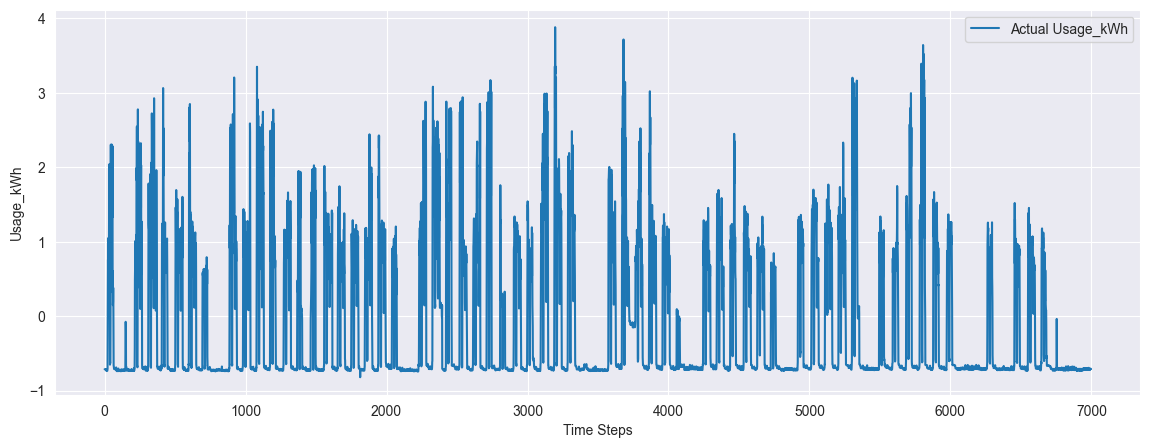

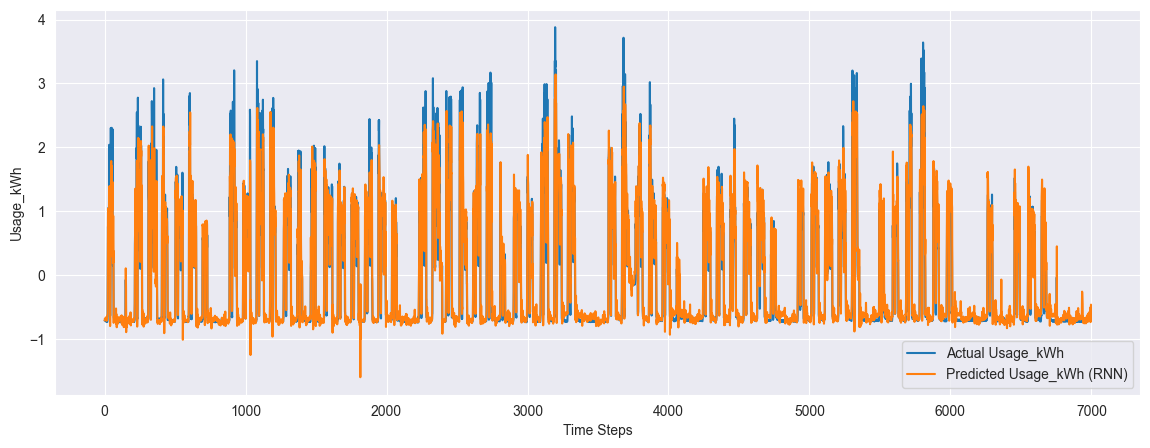

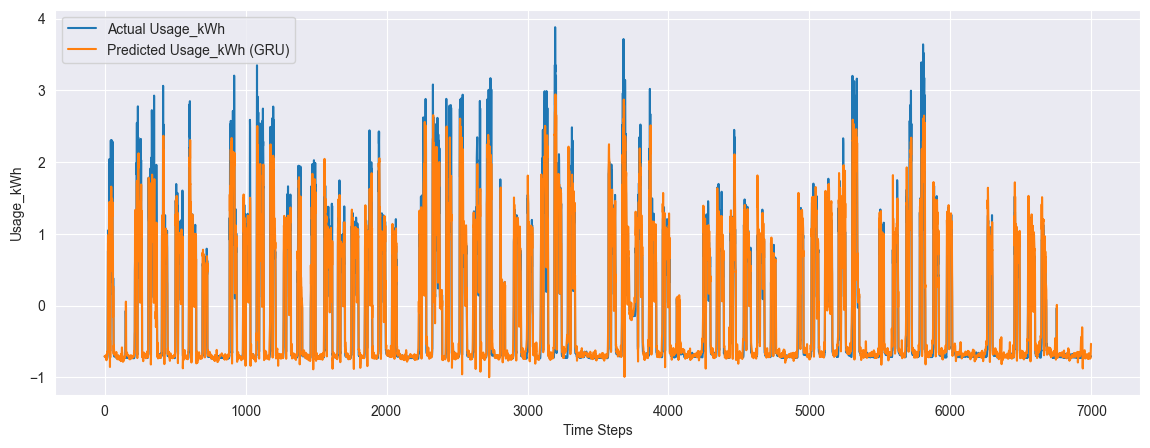

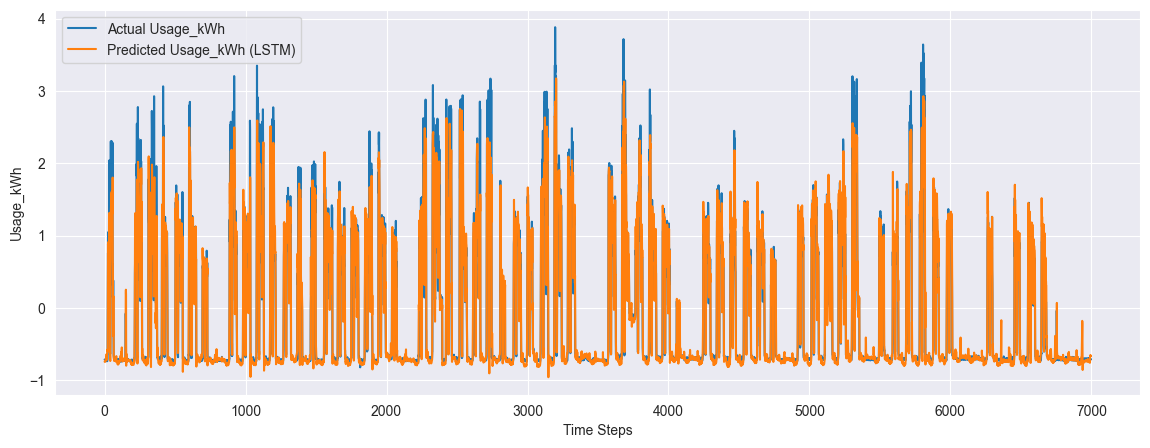

In [42]:
plt.figure(figsize=(14, 5))
plt.plot(range(len(y_test)), y_test, label='Actual Usage_kWh')
plt.xlabel('Time Steps')
plt.ylabel('Usage_kWh')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(range(len(y_test)), y_test, label='Actual Usage_kWh')
plt.plot(range(len(y_pred_rnn)), y_pred_rnn, label='Predicted Usage_kWh (RNN)')
plt.xlabel('Time Steps')
plt.ylabel('Usage_kWh')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(range(len(y_test)), y_test, label='Actual Usage_kWh')
plt.plot(range(len(y_pred_gru)), y_pred_gru, label='Predicted Usage_kWh (GRU)')
plt.xlabel('Time Steps')
plt.ylabel('Usage_kWh')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(range(len(y_test)), y_test, label='Actual Usage_kWh')
plt.plot(range(len(y_pred_lstm)), y_pred_lstm, label='Predicted Usage_kWh (LSTM)')
plt.xlabel('Time Steps')
plt.ylabel('Usage_kWh')
plt.legend()
plt.show()